# T1 Circuit Experiment

## T1 Characterization

In the T1 experiment the excited qubit will be mesasured after a delay. The aim of this experiment is to characterize the decay rate of the qubit towards the ground state. There is a possibility that at the time of measurement, after the delay, the qubit will not be excited due to decoherence processes and has a high chance of falling to ground state if the delay time is quite large

The following code is for qubit 0 and the estimated probability to measure |1> after the delay is done by choosing a fixed delay time t and number of shots s .Then, the procedure of exciting the qubit and measuring  then repeated for s times and thereafter this entire process is repeated for the set of delay times, resulting in a set of probabilty estimates.

In the absence of state preparation and measurement errors, the probability to measure |1> after time t is exp^(-t/T1), for a constant T1(coherance time), which is our target number. Since state preparation and measurement errors do exist, the qubit’s decay towards the ground state assumes the form A*exp^(-t/T1) + B, for parameters A,T1 and B, which we deduce from the probability estimates.[1]

[1]: https://qiskit.org/ecosystem/experiments/manuals/characterization/t1.html



In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

In [2]:
!pip install qiskit-experiments
import qiskit_experiments

In [ ]:
!pip install qiskit-aer

In [4]:
import qiskit_aer

/usr/local/lib/python3.10/dist-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


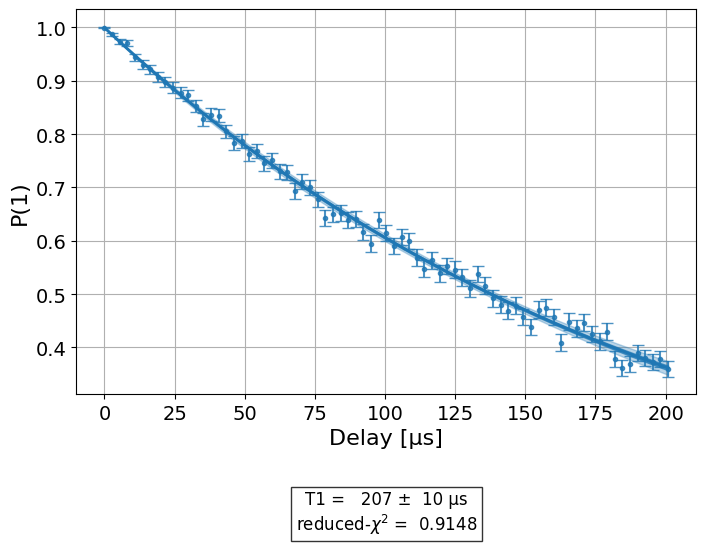

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 72
 - chi-square: 65.86582444514269
 - reduced chi-square: 0.9148031172936485
 - Akaike info crit.: -3.740130280232398
 - Bayesian info crit.: 3.2123340603765325
 - init params:
  * amp = 0.6390243902439025
  * tau = 0.00019773675906677803
  * base = 0.36048780487804877
 - fit params:
  * amp = 1.0282056333631986 ± 0.0349410732206717
  * tau = 0.00020725469819764703 ± 1.0037757845561773e-05
  * base = -0.028543372345497173 ± 0.03504216210807424
 - correlations:
  * (amp, base) = -0.9998235573057819
  * (tau, base) = -0.9919619941762543
  * (amp, tau) = 0.9912382006462206
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000207+/-0.000010
- χ²: 0.9148031172936485
- quality: good
- extra: <1 item

In [5]:
import numpy as np
from qiskit.qobj.utils import MeasLevel
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1
from qiskit_experiments.library.characterization.analysis.t1_analysis import T1KerneledAnalysis

# A T1 simulator
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# A kerneled data simulator
from qiskit_experiments.test.mock_iq_backend import MockIQBackend
from qiskit_experiments.test.mock_iq_helpers import MockIQT1Helper

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1


# Time intervals to wait before measurement
#dt_times = np.linspace(0, 1332000, 75)
delays = np.linspace(0, 1*qubit0_t1, 75)
#delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)

# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')


# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()


# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)


## Data Extraction

In [6]:
exp_data.data()

[{'counts': {'1': 1024},
  'job_id': '5465fce0-6bbd-42dc-92e1-98e21d5a15c1',
  'metadata': {'experiment_type': 'T1', 'qubit': 0, 'unit': 's', 'xval': 0.0},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 13, '1': 1011},
  'job_id': '5465fce0-6bbd-42dc-92e1-98e21d5a15c1',
  'metadata': {'experiment_type': 'T1',
   'qubit': 0,
   'unit': 's',
   'xval': 2.714858573415983e-06},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 27, '1': 997},
  'job_id': '5465fce0-6bbd-42dc-92e1-98e21d5a15c1',
  'metadata': {'experiment_type': 'T1',
   'qubit': 0,
   'unit': 's',
   'xval': 5.429717146831966e-06},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 30, '1': 994},
  'job_id': '5465fce0-6bbd-42dc-92e1-98e21d5a15c1',
  'metadata': {'experiment_type': 'T1',
   'qubit': 0,
   'unit': 's',
   'xval': 8.14457572024795e-06},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 57, '1': 

In [20]:
y_vals = []

for i in range(len(exp_data.data())):
  counts = exp_data.data()[i]['counts']
  y_vals.append(counts['1']/1024)

print(y_vals)

xval_values = [entry['metadata']['xval'] for entry in exp_data.data()]

# Print the extracted xval values
x_vals=[]
for xval in xval_values:
    x_vals.append(xval)


print(x_vals)


[1.0, 0.9873046875, 0.9736328125, 0.970703125, 0.9443359375, 0.9306640625, 0.921875, 0.9072265625, 0.8974609375, 0.8876953125, 0.8779296875, 0.873046875, 0.853515625, 0.828125, 0.8369140625, 0.8349609375, 0.8056640625, 0.7841796875, 0.787109375, 0.763671875, 0.7685546875, 0.7451171875, 0.7509765625, 0.73046875, 0.728515625, 0.693359375, 0.7109375, 0.7001953125, 0.677734375, 0.642578125, 0.6494140625, 0.65234375, 0.6396484375, 0.640625, 0.6171875, 0.5947265625, 0.6396484375, 0.615234375, 0.5908203125, 0.607421875, 0.599609375, 0.568359375, 0.5478515625, 0.5634765625, 0.5390625, 0.552734375, 0.5458984375, 0.53125, 0.5107421875, 0.5380859375, 0.515625, 0.4921875, 0.48046875, 0.46875, 0.478515625, 0.45703125, 0.4384765625, 0.470703125, 0.474609375, 0.45703125, 0.4091796875, 0.4482421875, 0.435546875, 0.4462890625, 0.4248046875, 0.4111328125, 0.4296875, 0.37890625, 0.361328125, 0.369140625, 0.3896484375, 0.380859375, 0.373046875, 0.3779296875, 0.3603515625]
[0.0, 2.714858573415983e-06, 5.42

In [23]:
import pandas as pd

# Create a DataFrame
data = {'x': x_vals, 'y': y_vals}
df = pd.DataFrame(data)
df

# Save the DataFrame to a CSV file
#df.to_csv('T1_Experiment_Data.csv', index=False)

,x,y
0,0.000000,1.000000
1,0.000003,0.987305
2,0.000005,0.973633
3,0.000008,0.970703
4,0.000011,0.944336
...,...,...
70,0.000190,0.389648
71,0.000193,0.380859
72,0.000195,0.373047
73,0.000198,0.377930


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['x'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['x'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['x', 'y']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['x', 'y', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['x', 'count()', None], **{})
chart

## Numerical Solution
## Hierarchical equations of motion

### The following Hierarchical equations of motion are for a one-qubit system with N=2 :

$$
\frac{d}{dt}p = -i[H_{\text{s}},p] + [V_{\text{1}},\sigma^{(1,0)}] + [V_{\text{2}},\sigma^{(0,1)}]
$$

$$
\frac{d}{dt}\sigma^{(0,1)} = -i[H_{\text{s}},\sigma^{(0,1)}] - n_2\gamma_2\sigma^{(0,1)} + [V_1,\sigma^{(1,1)}] + [V_2,\sigma^{(0,1)}] + n_2i(C[V_2,p] - iD\gamma_2\{ V_2, p \} )
$$

$$
\frac{d}{dt}\sigma^{(1,0)} = -i[H_{\text{s}},\sigma^{(1,0)}] - n_1\gamma_1\sigma^{(1,0)} + [V_1,\sigma^{(2,0)}] + [V_2,\sigma^{(1,1)}] + n_1i(E[V_1,p] - iF\gamma_1\{ V_1, p \} )
$$

where the terminating terms are :

$$
\frac{d}{dt}\sigma^{(1,1)} = -i[H_{\text{s}},\sigma^{(1,1)}]
$$

$$
\frac{d}{dt}\sigma^{(2,0)} = -i[H_{\text{s}},\sigma^{(2,0)}]
$$

$$
\frac{d}{dt}\sigma^{(0,2)} = -i[H_{\text{s}},\sigma^{(0,2)}]
$$

and the intial conditions are :

$$
p=\sigma^{(0,0)}=\begin{bmatrix}
  0.5 & 0 \\
  0 & 0.5 \\
\end{bmatrix}
$$

$$
\sigma^{(0,2)}=\sigma^{(2,0)}=\sigma^{(1,1)}=\sigma^{(1,0)}=\sigma^{(0,1)}=\begin{bmatrix}
  0 & 0 \\
  0 & 0 \\
\end{bmatrix}
$$


### The intial conditons are set in the code below :

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

H=np.array([[1, 0],[0,1]], dtype=complex)
V1=np.array([[1, 0],[0,1]], dtype=complex)
V2=np.array([[1, 0],[0,1]], dtype=complex)
lamda1=1.0
lamda2=2.0
gamma1=1.0
gamma2=2.0
kb= 1.380649*(10**(-23)) #J.K^-1
temp=2.15 #K
beta=1/(kb*temp)
h_bar=1.054571817*(10**(-34))

C=2*lamda1/beta*(h_bar**2)
D=lamda1*gamma1/h_bar
E=2*lamda2/beta*(h_bar**2)
F=lamda2*gamma2/h_bar
n1=1.0
n2=1.0
#E=np.array([[1, 1],[1,1]], dtype=complex)
#E=1.0
#D=1.0
#C=1.0
#F=1.0

#gamma1=np.array([[1, 0],[0,1]], dtype=complex)
#gamma2=np.array([[2, 0],[0,2]], dtype=complex)

#gamma1=1.0
#gamma2=1.0

<ipython-input-25-f0d248106ffa>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


### Euler's Method
### The Hierarchical equations of motion can be solved simulataneously using the euler's method shown in the code below :

In [34]:
t_i = 0 # intial time
t_f = 5 #final time
nsteps = 10 # number of steps between intial and final times
#time = np.linspace(0, 74*4, 75)
#xd = time/1e3

h = (t_f-t_i)/nsteps # increments
intial_p=np.array([[0, 1],[0,1]], dtype=complex)

def HEOM_eqn_solver(intial_val,gamma1,gamma2,lamda1,lamda2,V1,V2):

    current_state = np.zeros((6,2,2),dtype=complex) # 6 2x2 matrices for p, \sigma_(0,1),\sigma_(1,0),\sigma_(1,1),\sigma_(2,0),\sigma_(0,2)
    prev_state = np.zeros((6,2,2),dtype=complex)

    current_state[0] = np.array(intial_val, dtype=complex) # inital value for p
    prev_state[0]=current_state[0]

    p_matrix=np.zeros((nsteps+1,2,2),dtype=complex) # matrix that stores the matrices for d/dt(p)(results)
    p_matrix[0]=current_state[0]

    for index in range(1,t_f):
        current_state[0] = prev_state[0] + h*( -1j*(np.dot(H,prev_state[0])-np.dot(prev_state[0],H)) + (np.dot(V1,prev_state[1])-np.dot(prev_state[1],V1)) + (np.dot(V2,prev_state[2])-np.dot(prev_state[2],V2)))
        p_matrix[index]=current_state[0] # stores result in p_matrix
        n1=0
        n2=1
        current_state[1] = prev_state[1] + h*(1j*(np.dot(H,prev_state[1])-np.dot(prev_state[1],H)) - n2 * gamma2 * prev_state[1] + (np.dot(V1,prev_state[5])-np.dot(prev_state[5],V1)) + n2*1j*((C*(np.dot(V2,prev_state[0])-np.dot(prev_state[0],V2)) -1j*D*gamma2*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V2,prev_state[4])-np.dot(prev_state[4],V2)))
        n1=1
        n2=0
        current_state[2] = prev_state[2] + h*(1j*(np.dot(H,prev_state[2])-np.dot(prev_state[2],H)) - n1*gamma1*prev_state[2] + (np.dot(V2,prev_state[5])-np.dot(prev_state[5],V2)) + n1*1j*((E*(np.dot(V1,prev_state[0])-np.dot(prev_state[0],V1)) +1j*F*gamma1*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V1,prev_state[3])-np.dot(prev_state[3],V1)))

        current_state[3] = prev_state[3] + h*(-1j*(np.dot(H,prev_state[3])-np.dot(prev_state[3],H)))

        current_state[4] = prev_state[4] + h*(-1j*(np.dot(H,prev_state[4])-np.dot(prev_state[4],H)))

        current_state[5] = prev_state[5] + h*(-1j*(np.dot(H,prev_state[5])-np.dot(prev_state[5],H)))

        for i in range(6):
            prev_state[i]=current_state[i]


    return p_matrix

sol=HEOM_eqn_solver(intial_p,gamma1,gamma2,lamda1,lamda2,V1,V2)

### The solution is plotted for :
$$
\frac{d}{dt}p
$$

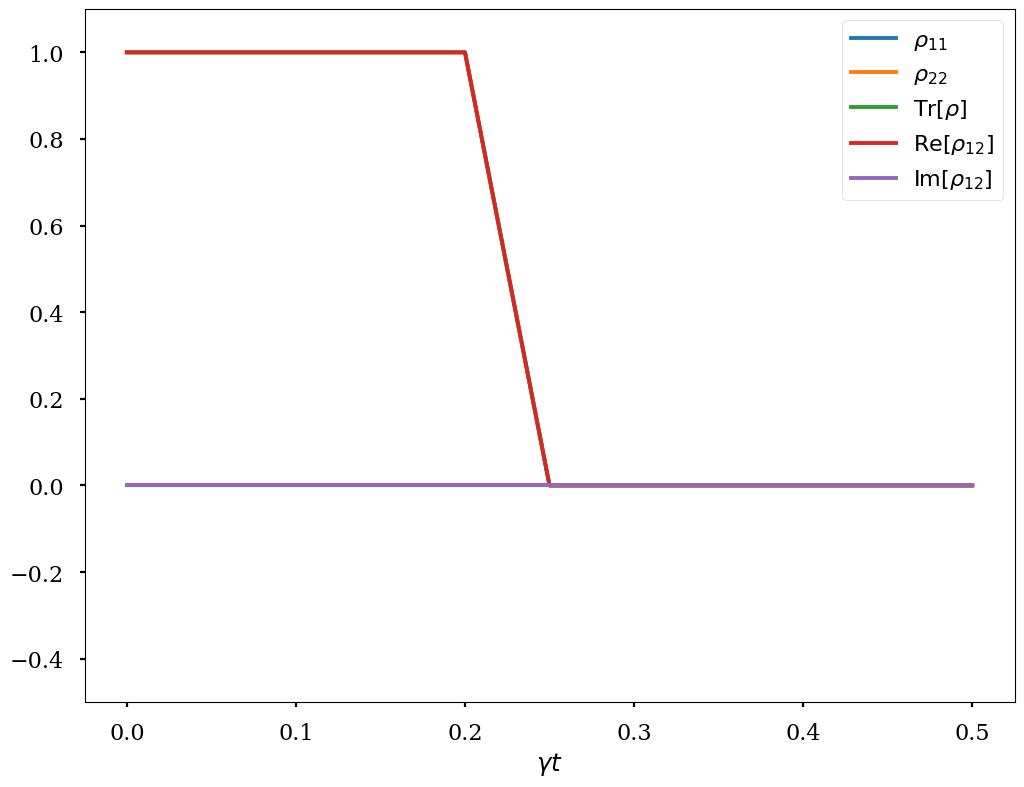

In [35]:
plt.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)

# plots the elements in p_matrix

plt.plot(trange,np.real(sol[:, 0, 0]), label = r'$\rho_{11}$') # first elements
plt.plot(trange,np.real(sol[:, 1, 1]), label = r'$\rho_{22}$') # fourth elements
plt.plot(trange,np.real(sol[:, 1, 1]+ sol[:, 0, 0]), label = r'$\mathrm{Tr}[\rho]$') # the trace of p matrices
plt.plot(trange,np.real(sol[:, 0, 1]), label = r'$\mathrm{Re}[\rho_{12}]$') # real part of second element
plt.plot(trange,np.imag(sol[:, 0, 1]), label = r'$\mathrm{Im}[\rho_{12}]$') # imaginary part of second element

plt.xlabel('$\gamma t$')
plt.ylim(-0.5, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

## Comparison of Experiment(Device) results and Numerical Solutions

## Data Optimization

In [40]:
def mse(observations, estimates): # Least squares function

    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''

    obav = []
    diff = []
    var = []
    dlen = len(time)

    for i in range(N):
        obav.append(sum(observations[i])/dlen)
        diff.append(jnp.abs(observations[i] - estimates[i]))
        var.append(jnp.abs(observations[i] - obav[i]))

    sq_diff = sum(diff) ** 2
    mse = sum(sq_diff)
    vari = sum(sum(var) ** 2)
    r2 = (1 - (mse/vari)) * 100

    return mse


def reg(observations, estimates):
    obav = []
    diff = []
    var = []
    dlen = len(time)

    for i in range(N):
        obav.append(sum(observations[i])/dlen)
        diff.append(jnp.abs(observations[d] - estimates[d]))
        var.append(jnp.abs(observations[a] - obav[a]))

    sq_diff = sum(diff) ** 2
    mse = sum(sq_diff)
    vari = sum(sum(var) ** 2)
    r2 = (1 - (mse/vari)) * 100

    return r2


# Minimisse the Least Squares funnction

def minmse_0(intial_val,gamma1,gamma2,lamda1,lamda2,V1,V2):

    rhot1 = HEOM_eqn_solver(intial_val,gamma1,gamma2,lamda1,lamda2,V1,V2)

    #not sure why Experiment data has one set of data plotted

    #data from experiment
    tdata1=np.array(y_vals, dtype=np.float64)
    tdata=[tdata1,tdata1,tdata1,tdata1]

    #data from numerical solution
    tst1 = rhot1[:, 0, 0]
    tst2 = rhot1[:, 1, 1]
    tst3 = rhot1[:, 2, 2]
    tst4 = rhot1[:, 3, 3]
    tstd = [tst1, tst2, tst3, tst4]

    return mse(tdata, tstd)

minmse_0(intial_p,gamma1,gamma2,lamda1,lamda2,V1,V2) # return the Mean Square Error value


IndexError: ignored

### Adam gradient Decent Optimiser

In [ ]:
# Define an adam gradient descent optimiser

minfunc_0 = vmap(minmse_0)

scorelst_0 = []
t0st = []

# bounds = jnp.array([w0, w1, g1l[0], g1l[1], j01, n1, n2], dtype = jnp.float32)

def adam_jack_0(bound, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bound
    first = x
    best = x
    worst = x
    # Calculate the MSE for x-parameters using the vectorized function
    score = minfunc_0(jnp.array([[x]]))
    # score = minmse(jnp.array([x]))
    scbest = score
    print('f(%s) = %f' % (x, score))

    J = jacrev(minmse_0)

    m = jnp.zeros(len(prms1))
    v = jnp.zeros(len(prms1))

    for t in range(n_iter + 1):
        # calculate gradient g(t)
        g = J([x])[0]

        m = beta1 * m + (1.0 - beta1) * g
        v = beta2 * v + (1.0 - beta2) * g**2

        mhat = m / (1.0 - beta1**(t+1))
        vhat = v / (1.0 - beta2**(t+1))

        x = x - alpha * mhat / (sqrt(vhat) + eps)

        for i in range(len(x)):
            if x[i] < 0:
                x = index_update(x, index[i], bound[i])

        if scbest > minmse_0(jnp.array([x])):
            best = x
            scbest = minmse_0(jnp.array([best]))

        # evaluate candidate point
        score = minfunc_0(jnp.array([[x]]))
        # score = minmse_11(jnp.array([x]))
        scorelst_0.append(score)
        t0st.append(t)
        print('>%d => %f' % (t, score))
    return [best, scbest]

In [ ]:
#parameters
bnds = np.array([gamma1,gamma2,lamda1,lamda2,V1,V2])

In [ ]:
# Run the gradient descent algorithm

# define the total iterations
n_iter = 500
# steps size
alpha = 0.1
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best_11, score_11 = adam_jack_11(bnds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best_11, score_11))

In [ ]:
%matplotlib inline
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(tlst, scorelst_11, label = 'Least Squares Error', color = cool[1])

plt.title('Optimisation of $T1$ Parameters for ' + r'$\alpha$' + ' = ' + str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Error')
# plt.ylim(-0.05, 1.05)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

In [ ]:
t0_best_0 = func_t1(xd, init_00, *best_11) # have not adjusted this code as yet

In [ ]:
#R2 Regression
# havent changed this code  yet
np.round(reg([jnp.array(t1mit_lst11_11, dtype=jnp.float64), jnp.array(t1mit_lst01_11, dtype=jnp.float64), jnp.array(t1mit_lst10_11, dtype=jnp.float64), jnp.array(t1mit_lst00_11, dtype=jnp.float64)],
    [t1_best_11[:, 0, 0], t1_best_11[:, 1, 1], t1_best_11[:, 2, 2], t1_best_11[:, 3, 3]]), 2)

In [ ]:
%matplotlib inline
plt.style.use('seaborn')
# matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(time, t1_best_11[:, 0, 0], label = 'Best 11', color = cool[0])
plt.plot(time, t1_best_11[:, 1, 1], label = 'Best 01', color = cool[1])
plt.plot(time, t1_best_11[:, 2, 2], label = 'Best 10', color = cool[2])
plt.plot(time, t1_best_11[:, 3, 3], label = 'Best 00', color = cool[3])

plt.plot(time, t1mit_lst11_11, label = '11', marker='.', markersize=10, linestyle='', color = cool[0])
plt.plot(time, t1mit_lst01_11, label = '01', marker='.', markersize=10, linestyle='', color = cool[1])
plt.plot(time, t1mit_lst10_11, label = '10', marker='.', markersize=10, linestyle='', color = cool[2])
plt.plot(time, t1mit_lst00_11, label = '00', marker='.', markersize=10, linestyle='', color = cool[3])

plt.title('$T1$ Decay of Qubit 0 & 1')
plt.xlabel('$t$ ($\mu$s)')
plt.ylabel('Excited State Population')
plt.ylim(-0.05, 1.05)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()